In [1]:
import tqdm
import numpy as np
import pandas as pd
import time as clock
from functions import *
from ranking import main
from TKS import TessKeckSurvey, DataProducts, Sample

## $\rm Load\; TKS\; TOIs\_perfect\; \&\; show\; columns \; available$

In [2]:
TKS = TessKeckSurvey(emcee = False, verbose = False)
candidates = TKS.df
print(candidates.columns.values.tolist())

['toi', 'tic', 'cps_name', 'tic_jump', 'toi_jump', 'evol', 'source', 'disp', 'photo_vetting', 'spec_vetting', 'ao_vetting', 'ra', 'dec', 'tmag', 'tmag_err', 'vmag', 'jmag', 'nobs', 'last_observed', 'rms', 'errvel', 'template', 'nobs_goal', 'tottime', 'remaining_nobs', 'remaining_time', 'n_comments', 'last_comment', 'rs', 'rs_err', 'r_s', 'm_s', 'teff', 'teff_err', 't_eff', 'logg', 'logg_err', 'feh', 'ast_det_c', 'current_sectors', 'ast_det_t', 'total_sectors', 'color', 'spectral_type', 'vsini', 'prot', 'sval', 'logrhk', 'jitter', 'activity', 'ruwe', 'rp', 'rp_err', 'mp', 'k', 'kerr', 'ksig', 'epoch', 'epoch_err', 'period', 'period_err', 'dur', 'dur_err', 'b_est', 'circ_dur', 'circ_dur_err', 'max_circ_dur', 'a_to_R', 'depth', 'depth_err', 'teq', 'sinc', 'SNR', 'dist', 'prv', 'ra_J2000', 'dec_J2000', 'tks_comments', 'toi_comments', 'comment_list', 'npl', 'in_other_programs', 'in_SC1A', 'in_SC1B', 'in_SC1C', 'in_SC1D', 'in_SC1E', 'in_SC2A', 'in_SC2Bi', 'in_SC2Bii', 'in_SC2C', 'in_SC3', 'i

## $\rm View\; programs\; dictionary$

In [3]:
programs = TKS.programs
print(programs)

                            method  \
SC1A     hires-nobs=60-counts=ramp   
SC1B     hires-nobs=60-counts=ramp   
SC1C     hires-nobs=60-counts=ramp   
SC1D     hires-nobs=60-counts=ramp   
SC1E     hires-nobs=60-counts=ramp   
SC2A       hires-nobs=20-counts=60   
SC2Bi    hires-nobs=60-counts=ramp   
SC2Bii   hires-nobs=60-counts=ramp   
SC2C    hires-nobs=100-counts=ramp   
SC3      hires-nobs=60-counts=ramp   
SC4      hires-nobs=60-counts=ramp   
TOA      hires-nobs=60-counts=ramp   
TOB     hires-nobs=100-counts=ramp   

                                                   filter  \
SC1A    photo_vetting == 'passed' and spec_vetting != ...   
SC1B    photo_vetting == 'passed' and spec_vetting != ...   
SC1C    photo_vetting == 'passed' and spec_vetting != ...   
SC1D    photo_vetting == 'passed' and spec_vetting != ...   
SC1E    photo_vetting == 'passed' and spec_vetting != ...   
SC2A    photo_vetting == 'passed' and spec_vetting != ...   
SC2Bi   photo_vetting == 'passed' and sp

## $\rm Specific\; science\; case$

In [4]:
case = 'SC2C'

print(programs.loc[case])
print(programs.loc[case].high_priority)

method                                    hires-nobs=100-counts=ramp
filter             spec_vetting != 'known planet' and npl > 1 and...
prioritize_by                                     [npl, actual_cost]
ascending_by                                           [False, True]
high_priority                                                     []
total_nights                                                 2.19298
remaining_hours                                              52.6316
name                                                            SC2C
pick_number                                                        0
n_targets_left                                                    26
Name: SC2C, dtype: object
[]


## $\rm Run\; ranking\; algorithm$

In [5]:
TKSsurvey, data = main(emcee = False, notebook = True, verbose = True)


-- prioritization starting --

  - loading TOIs and science program information
  - 715 TOIs are observable per TKS standards and have promising dispositions
  - 233 of these have also passed photometric & spectroscopic vetting
  - ranking scheme initialized
  - 87 of these have been selected in the individual program process
  - algorithm took 42 seconds to run
  - making data products
  - copy of updated TOI spreadsheet saved to results/TOIs_perfect_final.csv
  - ranking steps of the algorithm have been saved to results/ranking_steps.csv
  - final prioritized list saved to results/observing_priorities.csv
  - TKS - Prioritization saved to results/tks_prioritization.txt
  - final costs saved to results/total_costs.csv
  - spreadsheet containing program overlap saved to results/program_overlap.csv

--- process complete ---


---------------------------------------------------------------------------------------------------------------------

# $\rm \textbf{SUMMARY RESULTS} $

### $\rm Number\; of\; targets\; in\; each\; program$

In [6]:
data.get_stats()


Stats:

Using 502.79 telescope hours, a total of 87 unique targets were selected
 - 35 of these were only selected by one program
 - 43 targets were selected by at least 3 programs
 - 28 targets were selected by at least 5 programs
 - 0 targets were selected by 8 or more programs!

*** Note: this list of targets actually costs a total of 631.35 telescope hours
    but 128.56 of these hours are from observations TKS already has in hand ***

Out of the 87 total targets:
 - SC1A has 21 targets
 - SC1B has 38 targets
 - SC1C has 15 targets
 - SC1D has 3 targets
 - SC1E has 45 targets
 - SC2A has 54 targets
 - SC2Bi has 14 targets
 - SC2C has 9 targets
 - SC3 has 39 targets
 - SC4 has 9 targets
 - TOA has 87 targets
 - TOB has 19 targets



### $\rm See\; selected \; targets$

In [7]:
print(data.observed)

          tic   toi  priority                      programs
0   283722336  1469         1      [SC1A, SC1B, SC1E, SC2A]
1   232540264  1247         2  [SC3, SC1B, SC2A, TOB, SC1E]
2   407966340   554         3        [TOB, SC1E, SC3, SC1B]
3   453211454   509         4  [SC1E, SC3, SC1B, TOB, SC2A]
4   124573851   669         5             [SC1B, SC1E, SC3]
..        ...   ...       ...                           ...
82  137906197  1768        83                        [SC2A]
83  376353509  1648        84                        [SC2A]
84  326114850  1504        85                        [SC2A]
85  229951289  1609        86                        [SC2A]
86  230377505  1706        87                        [SC1A]

[87 rows x 4 columns]


### $\rm See\; overlap$

In [8]:
print(data.overlap.head())

         tic   toi priority in_SC1A in_SC1B in_SC1C in_SC1D in_SC1E in_SC2A  \
0  283722336  1469        1       X       X       -       -       X       X   
1  232540264  1247        2       -       X       -       -       X       X   
2  407966340   554        3       -       X       -       -       X       -   
3  453211454   509        4       -       X       -       -       X       X   
4  124573851   669        5       -       X       -       -       X       -   

  in_SC2Bi in_SC2Bii in_SC2C in_SC3 in_SC4 in_TOA in_TOB total_programs  
0        -         -       -      -      -      -      -              4  
1        -         -       -      X      -      -      X              5  
2        -         -       -      X      -      -      X              4  
3        -         -       -      X      -      -      X              5  
4        -         -       -      X      -      -      -              3  


## $\rm Check\; amount\; of\; overlap\; for\; targets \; selected\; from\; a\; given\; program$

In [9]:
science_case = 'SC2A'

program = data.overlap.query("in_%s == 'X'"%science_case)

# how many have 5 or more programs?
query = program.query('total_programs >= 5')
print('%d picked targets had large overlap (>= 5 programs) with other programs'%len(query))

20 picked targets had large overlap (>= 5 programs) with other programs


## $\rm Knowing\; the\; starting\; sample\; vs\; the \; final\; sample\; for\; a\; given\; program$

In [10]:
from ranking import Sample

science = 'SC2A'
tks = Sample(data.final)

sc2 = tks.in_science(science)
print('There was %d relevant targets to choose from'%len(sc2))
sc2 = tks.in_sample(science)
print('%d of them were selected'%len(sc2))

There was 83 relevant targets to choose from
60 of them were selected


Populating the interactive namespace from numpy and matplotlib


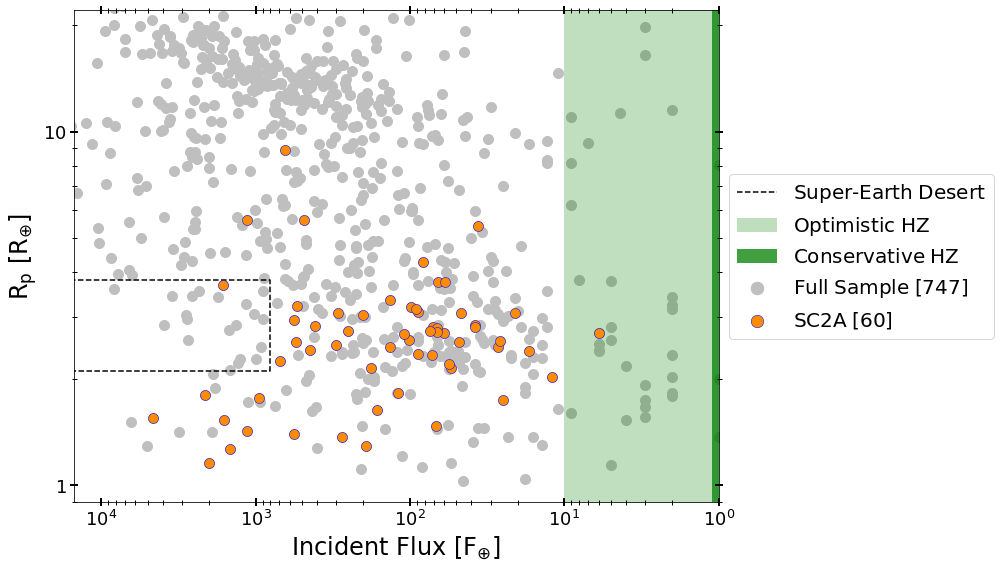

In [11]:
%pylab inline


df2 = data.final
program = data.final.query("in_%s == 1"%science_case)

rp_all = df2.rp.values.tolist()
sinc_all = df2.sinc.values.tolist()
rp = program.rp.values.tolist()
sinc = program.sinc.values.tolist()

plt.figure(figsize = (14,8))

ax = plt.subplot(1,1,1)
p1 = (1e6, 2.1)
p2 = (800, 3.8)
plt.plot((p1[0], p2[0], p2[0], p1[0]), (p1[1], p1[1], p2[1], p2[1]), 'k--', zorder = 0, label = r'$\rm Super$-$\rm Earth \; Desert$')
ax.scatter(sinc_all, rp_all, c = '0.75', s = 100., zorder = 0, label = r'$\rm Full \; Sample \; [%s]$'%(str(int(len(rp_all)))))
ax.scatter(sinc, rp, c = '#ff8c00', s = 100., lw = 0.5, edgecolor = 'b', zorder = 2, label = r'$\rm %s \; [%s]$'%(science, str(int(len(rp)))))
ax.set_ylabel(r"$\rm R_{p}\,\, [R_{\oplus}]$", fontsize = 24.)
ax.set_xlabel(r"$\rm Incident\,\, Flux\,\, [F_{\oplus}]$", fontsize = 24.)
ax.tick_params(axis = 'both', which = 'minor', length = 5, width = 1, direction = 'inout')
ax.tick_params(axis = 'both', which = 'major', length = 8, width = 2, direction = 'inout')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.yscale("log")
plt.xscale("log")
ax.axvspan(0.25, 10., facecolor = 'g', alpha = 0.25, zorder = 0, label = r'$\rm Optimistic \; HZ$')
ax.axvspan(0.25, 1.1, facecolor = 'g', alpha = 0.75, zorder = 0, label = r'$\rm Conservative \; HZ$')
ax.set_xticks([0.1, 1, 10, 100, 1000, 10000, 100000])
ax.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$', r'$10^{5}$'])
ax.set_yticks([1, 10])
ax.set_yticklabels([r'$1$', r'$10$'])
ax.legend(fontsize = 20., loc = 'center left', bbox_to_anchor = (1, 0.5), markerscale = 1.25)
plt.tick_params(labelsize = 18)
plt.xlim([15000., 1.])
plt.ylim([0.9, 22.])
plt.tight_layout()